# Assignment 1: Data Parsing, Cleansing and Integration
## Task 3
#### Student Name: Ayush Kamleshbhai Patel
#### Student ID: s3891013

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy


## Introduction
The dataset consolidates job listings and associated details from different job search platforms. Analyzing and cleaning up this data is increasingly important for job search websites, as it can improve the user experience. I will work on identifying and solving issues related to integrating this data, which is stored in XML format and may have unknown quality issues.

## Identified Conflicts
### Schema level conflicts
* Typos and spelling mistakes
* Irregularities, e.g., abnormal data values and data formats
* Violations of the Integrity constraint.
* Outliers
* Duplications
* Missing values
* Inconsistency, e.g., inhomogeneity in values and types in representing the same data

### Data Level conflicts
* Duplications

##  Import libraries 

In [1]:
# Code to import libraries as you need in this assessment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### 1. Examining and loading data
Examine "s3891013_dataset2.csv" the structure and schema. 

In [2]:
# Import the pandas library to handle data manipulation and analysis
import pandas as pd

# Read the CSV file named 's3891013_dataset2.csv' into a DataFrame called df
df = pd.read_csv('s3891013_dataset2.csv')

# Print the number of missing values in each column of the DataFrame
# The method 'isnull()' checks for missing values and 'sum()' adds them up for each column
print("\nMissing Values in Each Column:\n", df.isnull().sum())

# Count the frequency of each unique value in the 'Type' column
# The method 'value_counts()' provides the counts of unique values in descending order
df['Type'].value_counts()



Missing Values in Each Column:
 Monthly Payment                  0
Closing                          0
Organisation                   486
Location                         0
Category                         0
Full-Time Equivalent (FTE)       0
Opening                          0
Job Title                        0
Type                          1420
dtype: int64


Type
Permanent              3040
Fixed Term Contract     540
Name: count, dtype: int64

In [3]:
# Displaying dataframe
df

,Monthly Payment,Closing,Organisation,Location,Category,Full-Time Equivalent (FTE),Opening,Job Title,Type
0,1200.00,2012-12-27 12:00:00,Protocol Education,UK,Education,0.8,2012-11-27 12:00:00,Higher Level Teaching Assistant (HLTA),NaN
1,3125.00,2013-08-25 15:00:00,Cordius Ltd,UK,Information Technology,1.0,2013-06-26 15:00:00,Software Developers / Software Architects Not...,Permanent
2,4333.33,2013-01-16 15:00:00,Understanding Recruitment,Walton-On-Thames,Information Technology,1.0,2012-10-18 15:00:00,Senior BI Consultant (Cognos),Permanent
3,3750.00,2013-02-13 15:00:00,Wallace Hind Selection,UK,Sales,1.0,2012-12-15 15:00:00,"Technical Sales Manager, Pigments Fillers to S...",NaN
4,2916.67,2013-01-12 12:00:00,Greenhill Group Ltd,Eastern England,Sales,1.0,2012-12-29 12:00:00,Channel Account Manager Software,NaN
...,...,...,...,...,...,...,...,...,...
4995,5833.33,2013-03-31 00:00:00,Jonathan Lee Recruitment Ltd,London,Finance,1.0,2013-01-30 00:00:00,Head of Regulatory Policy,Permanent
4996,5000.00,2012-08-27 12:00:00,Impact 360,Berkshire,Information Technology,1.0,2012-06-28 12:00:00,Android Developer eMarkets and eCommerce Ber...,Permanent
4997,2833.33,2013-07-23 00:00:00,Aspire Data Recruitment,London,Finance,1.0,2013-04-24 00:00:00,SAS Senior Collections Recoveries Analyst,Permanent
4998,4791.67,2012-12-18 15:00:00,Annapurna HR Ltd,London,Information Technology,1.0,2012-11-18 15:00:00,Lead PHP Magento Developer London ****k,Permanent


### 2. Resolving schema conflicts
* Typos and spelling mistakes
* Irregularities, e.g., abnormal data values and data formats
* Violations of the Integrity constraint.
* Outliers
* Duplications
* Missing values
* Inconsistency, e.g., inhomogeneity in values and types in representing the same data

<h4 style = 'color: lime'> Conflict 1: Naming conflict </h4>
Rename the 'closing' column to 'CloseDate', 'Opening' to 'OpenDate', 'Job Title' to 'Title', 'Organisation' to 'Company' and 'Type' to 'ContractType'

In [4]:
dataset1 = pd.read_csv('s3891013_dataset1_solution.csv')
print('Column names for dataset1: ', dataset1.columns.to_list())
print('Column names for dataset2: ', df.columns.to_list())


Column names for dataset1:  ['Id', 'Title', 'Location', 'Company', 'ContractType', 'ContractTime', 'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName']
Column names for dataset2:  ['Monthly Payment', 'Closing', 'Organisation', 'Location', 'Category', 'Full-Time Equivalent (FTE)', 'Opening', 'Job Title', 'Type']


As seen in above cell output, we have different column names for dataset1 and dataset2. 

In the below cell, we will be changing names of available columns and add/modify coolumns in the consequent steps. 

In [5]:
# 3. Rename columns
rename_columns = {
    'Closing': 'CloseDate',
    'Opening': 'OpenDate',
    'Job Title': 'Title',
    'Organisation': 'Company',
    'Type': 'ContractTime'
}
df.rename(columns=rename_columns, inplace=True)
df

,Monthly Payment,CloseDate,Company,Location,Category,Full-Time Equivalent (FTE),OpenDate,Title,ContractTime
0,1200.00,2012-12-27 12:00:00,Protocol Education,UK,Education,0.8,2012-11-27 12:00:00,Higher Level Teaching Assistant (HLTA),NaN
1,3125.00,2013-08-25 15:00:00,Cordius Ltd,UK,Information Technology,1.0,2013-06-26 15:00:00,Software Developers / Software Architects Not...,Permanent
2,4333.33,2013-01-16 15:00:00,Understanding Recruitment,Walton-On-Thames,Information Technology,1.0,2012-10-18 15:00:00,Senior BI Consultant (Cognos),Permanent
3,3750.00,2013-02-13 15:00:00,Wallace Hind Selection,UK,Sales,1.0,2012-12-15 15:00:00,"Technical Sales Manager, Pigments Fillers to S...",NaN
4,2916.67,2013-01-12 12:00:00,Greenhill Group Ltd,Eastern England,Sales,1.0,2012-12-29 12:00:00,Channel Account Manager Software,NaN
...,...,...,...,...,...,...,...,...,...
4995,5833.33,2013-03-31 00:00:00,Jonathan Lee Recruitment Ltd,London,Finance,1.0,2013-01-30 00:00:00,Head of Regulatory Policy,Permanent
4996,5000.00,2012-08-27 12:00:00,Impact 360,Berkshire,Information Technology,1.0,2012-06-28 12:00:00,Android Developer eMarkets and eCommerce Ber...,Permanent
4997,2833.33,2013-07-23 00:00:00,Aspire Data Recruitment,London,Finance,1.0,2013-04-24 00:00:00,SAS Senior Collections Recoveries Analyst,Permanent
4998,4791.67,2012-12-18 15:00:00,Annapurna HR Ltd,London,Information Technology,1.0,2012-11-18 15:00:00,Lead PHP Magento Developer London ****k,Permanent


<h4 style = 'color: lime'>  Conflict 2: Missing `Id`, `ContractType` and `SourceName` Columns </h4>
No `Id` column in dataset2, so needed to add it by generating random Id(integer type) for each entry

So, for the Id, I have carefully generated the values for this column such that there is not duplication of values with the dataset1, which has high probability considering the size of dataset1.
Also, if we generate random Ids everytime we run run code, and find a fix for specific run in proceeding steps, then when we run again, those fixes would not be effective anymore. 

In [6]:
# Open the file and read it thus, converting it to an array
with open('random_values.txt', 'r') as f:
    array_str = f.readlines()
    random_ids = [int(x.strip()) for x in array_str]

In [7]:
df['Id'] = random_ids  # Add the 'Id' column to the original DataFrame from the array

Adding the `ContractType` column. Since, this is a completely new column, as per requiremnets we will fill all the entries of this columns as 'non-specified'

In [8]:
df['ContractType'] = 'non-specified'
df

,Monthly Payment,CloseDate,Company,Location,Category,Full-Time Equivalent (FTE),OpenDate,Title,ContractTime,Id,ContractType
0,1200.00,2012-12-27 12:00:00,Protocol Education,UK,Education,0.8,2012-11-27 12:00:00,Higher Level Teaching Assistant (HLTA),NaN,87021649,non-specified
1,3125.00,2013-08-25 15:00:00,Cordius Ltd,UK,Information Technology,1.0,2013-06-26 15:00:00,Software Developers / Software Architects Not...,Permanent,95779293,non-specified
2,4333.33,2013-01-16 15:00:00,Understanding Recruitment,Walton-On-Thames,Information Technology,1.0,2012-10-18 15:00:00,Senior BI Consultant (Cognos),Permanent,96149145,non-specified
3,3750.00,2013-02-13 15:00:00,Wallace Hind Selection,UK,Sales,1.0,2012-12-15 15:00:00,"Technical Sales Manager, Pigments Fillers to S...",NaN,13677686,non-specified
4,2916.67,2013-01-12 12:00:00,Greenhill Group Ltd,Eastern England,Sales,1.0,2012-12-29 12:00:00,Channel Account Manager Software,NaN,19866288,non-specified
...,...,...,...,...,...,...,...,...,...,...,...
4995,5833.33,2013-03-31 00:00:00,Jonathan Lee Recruitment Ltd,London,Finance,1.0,2013-01-30 00:00:00,Head of Regulatory Policy,Permanent,22916183,non-specified
4996,5000.00,2012-08-27 12:00:00,Impact 360,Berkshire,Information Technology,1.0,2012-06-28 12:00:00,Android Developer eMarkets and eCommerce Ber...,Permanent,57321191,non-specified
4997,2833.33,2013-07-23 00:00:00,Aspire Data Recruitment,London,Finance,1.0,2013-04-24 00:00:00,SAS Senior Collections Recoveries Analyst,Permanent,59440723,non-specified
4998,4791.67,2012-12-18 15:00:00,Annapurna HR Ltd,London,Information Technology,1.0,2012-11-18 15:00:00,Lead PHP Magento Developer London ****k,Permanent,77649333,non-specified


To match dataset1, we also need to add `SourceName` column in which we will fill 'jobhuntlisting.com' for all its entries which is given in the spec sheet. 

In [9]:
df['SourceName'] = 'jobhuntlisting.com'
df

,Monthly Payment,CloseDate,Company,Location,Category,Full-Time Equivalent (FTE),OpenDate,Title,ContractTime,Id,ContractType,SourceName
0,1200.00,2012-12-27 12:00:00,Protocol Education,UK,Education,0.8,2012-11-27 12:00:00,Higher Level Teaching Assistant (HLTA),NaN,87021649,non-specified,jobhuntlisting.com
1,3125.00,2013-08-25 15:00:00,Cordius Ltd,UK,Information Technology,1.0,2013-06-26 15:00:00,Software Developers / Software Architects Not...,Permanent,95779293,non-specified,jobhuntlisting.com
2,4333.33,2013-01-16 15:00:00,Understanding Recruitment,Walton-On-Thames,Information Technology,1.0,2012-10-18 15:00:00,Senior BI Consultant (Cognos),Permanent,96149145,non-specified,jobhuntlisting.com
3,3750.00,2013-02-13 15:00:00,Wallace Hind Selection,UK,Sales,1.0,2012-12-15 15:00:00,"Technical Sales Manager, Pigments Fillers to S...",NaN,13677686,non-specified,jobhuntlisting.com
4,2916.67,2013-01-12 12:00:00,Greenhill Group Ltd,Eastern England,Sales,1.0,2012-12-29 12:00:00,Channel Account Manager Software,NaN,19866288,non-specified,jobhuntlisting.com
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5833.33,2013-03-31 00:00:00,Jonathan Lee Recruitment Ltd,London,Finance,1.0,2013-01-30 00:00:00,Head of Regulatory Policy,Permanent,22916183,non-specified,jobhuntlisting.com
4996,5000.00,2012-08-27 12:00:00,Impact 360,Berkshire,Information Technology,1.0,2012-06-28 12:00:00,Android Developer eMarkets and eCommerce Ber...,Permanent,57321191,non-specified,jobhuntlisting.com
4997,2833.33,2013-07-23 00:00:00,Aspire Data Recruitment,London,Finance,1.0,2013-04-24 00:00:00,SAS Senior Collections Recoveries Analyst,Permanent,59440723,non-specified,jobhuntlisting.com
4998,4791.67,2012-12-18 15:00:00,Annapurna HR Ltd,London,Information Technology,1.0,2012-11-18 15:00:00,Lead PHP Magento Developer London ****k,Permanent,77649333,non-specified,jobhuntlisting.com


<h4 style = 'color: lime'> Conflict 3: Salary conversion from monthly to annually. </h4>

To match the schema of dataset1, code below first calculates the full-time annual salary by multiplying the 'Monthly Payment' by 12 and stores it in a new column called 'Full-Time Annual Salary'. <br >
It then computes the actual annual salary, taking into account the 'Full-Time Equivalent (FTE)' value, and stores it in a column named 'Salary'. <br>
Finally, it drops the intermediate and now-redundant columns 'Monthly Payment', 'Full-Time Equivalent (FTE)', and 'Full-Time Annual Salary' from the DataFrame to leave only the final calculated 'Salary' and other original columns.

In [10]:
# 1. Calculate the Full-Time Annual Salary
df['Full-Time Annual Salary'] = df['Monthly Payment'] * 12

# 2. Calculate the Annual Salary based on the FTE value
df['Salary'] = df['Full-Time Annual Salary'] * df['Full-Time Equivalent (FTE)']

# 3. Drop the 'Monthly Payment', 'Full-Time Equivalent (FTE)', and 'Full-Time Annual Salary' columns
df.drop(columns=['Monthly Payment', 'Full-Time Equivalent (FTE)', 'Full-Time Annual Salary'], inplace=True)

# Display the first few rows of the modified dataset
df

,CloseDate,Company,Location,Category,OpenDate,Title,ContractTime,Id,ContractType,SourceName,Salary
0,2012-12-27 12:00:00,Protocol Education,UK,Education,2012-11-27 12:00:00,Higher Level Teaching Assistant (HLTA),NaN,87021649,non-specified,jobhuntlisting.com,11520.00
1,2013-08-25 15:00:00,Cordius Ltd,UK,Information Technology,2013-06-26 15:00:00,Software Developers / Software Architects Not...,Permanent,95779293,non-specified,jobhuntlisting.com,37500.00
2,2013-01-16 15:00:00,Understanding Recruitment,Walton-On-Thames,Information Technology,2012-10-18 15:00:00,Senior BI Consultant (Cognos),Permanent,96149145,non-specified,jobhuntlisting.com,51999.96
3,2013-02-13 15:00:00,Wallace Hind Selection,UK,Sales,2012-12-15 15:00:00,"Technical Sales Manager, Pigments Fillers to S...",NaN,13677686,non-specified,jobhuntlisting.com,45000.00
4,2013-01-12 12:00:00,Greenhill Group Ltd,Eastern England,Sales,2012-12-29 12:00:00,Channel Account Manager Software,NaN,19866288,non-specified,jobhuntlisting.com,35000.04
...,...,...,...,...,...,...,...,...,...,...,...
4995,2013-03-31 00:00:00,Jonathan Lee Recruitment Ltd,London,Finance,2013-01-30 00:00:00,Head of Regulatory Policy,Permanent,22916183,non-specified,jobhuntlisting.com,69999.96
4996,2012-08-27 12:00:00,Impact 360,Berkshire,Information Technology,2012-06-28 12:00:00,Android Developer eMarkets and eCommerce Ber...,Permanent,57321191,non-specified,jobhuntlisting.com,60000.00
4997,2013-07-23 00:00:00,Aspire Data Recruitment,London,Finance,2013-04-24 00:00:00,SAS Senior Collections Recoveries Analyst,Permanent,59440723,non-specified,jobhuntlisting.com,33999.96
4998,2012-12-18 15:00:00,Annapurna HR Ltd,London,Information Technology,2012-11-18 15:00:00,Lead PHP Magento Developer London ****k,Permanent,77649333,non-specified,jobhuntlisting.com,57500.04


<h4 style = 'color: lime'> Conflict 4: Misspelling and inconsistency in `ContractTime` and `Category` </h4>

For the column `ContractTime`, to match the schema of dataset1 and our requiremnets, code below first inspects the unique values in the `ContractTime` column to identify inconsistencies. <br>

In [11]:
# Code to fix the conflict
df['ContractTime'] = df['ContractTime'].str.strip()
df['ContractTime'].value_counts
pd.pandas.unique(df['ContractTime'])


array([nan, 'Permanent', 'Fixed Term Contract'], dtype=object)

To correct them, we will change: 
* 'Permanent' -> 'permanent'
* 'Fixed Term Contract' -> 'contract'
* 'nan' -> 'non-specified'

In [12]:
df['ContractTime'] = df['ContractTime'].replace({
    'Permanent': 'permanent',
    'Fixed Term Contract': 'contract'
}).fillna('non-specified')
pd.pandas.unique(df['ContractTime'])

array(['non-specified', 'permanent', 'contract'], dtype=object)

Rearranging the columns to match the order of dataset1

In [13]:
desired_order = [
    'Id', 'Title', 'Location', 'Company', 'ContractType', 
    'ContractTime', 'Category', 'Salary', 'OpenDate', 
    'CloseDate', 'SourceName'
]
df = df[desired_order]
df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,87021649,Higher Level Teaching Assistant (HLTA),UK,Protocol Education,non-specified,non-specified,Education,11520.00,2012-11-27 12:00:00,2012-12-27 12:00:00,jobhuntlisting.com
1,95779293,Software Developers / Software Architects Not...,UK,Cordius Ltd,non-specified,permanent,Information Technology,37500.00,2013-06-26 15:00:00,2013-08-25 15:00:00,jobhuntlisting.com
2,96149145,Senior BI Consultant (Cognos),Walton-On-Thames,Understanding Recruitment,non-specified,permanent,Information Technology,51999.96,2012-10-18 15:00:00,2013-01-16 15:00:00,jobhuntlisting.com
3,13677686,"Technical Sales Manager, Pigments Fillers to S...",UK,Wallace Hind Selection,non-specified,non-specified,Sales,45000.00,2012-12-15 15:00:00,2013-02-13 15:00:00,jobhuntlisting.com
4,19866288,Channel Account Manager Software,Eastern England,Greenhill Group Ltd,non-specified,non-specified,Sales,35000.04,2012-12-29 12:00:00,2013-01-12 12:00:00,jobhuntlisting.com
...,...,...,...,...,...,...,...,...,...,...,...
4995,22916183,Head of Regulatory Policy,London,Jonathan Lee Recruitment Ltd,non-specified,permanent,Finance,69999.96,2013-01-30 00:00:00,2013-03-31 00:00:00,jobhuntlisting.com
4996,57321191,Android Developer eMarkets and eCommerce Ber...,Berkshire,Impact 360,non-specified,permanent,Information Technology,60000.00,2012-06-28 12:00:00,2012-08-27 12:00:00,jobhuntlisting.com
4997,59440723,SAS Senior Collections Recoveries Analyst,London,Aspire Data Recruitment,non-specified,permanent,Finance,33999.96,2013-04-24 00:00:00,2013-07-23 00:00:00,jobhuntlisting.com
4998,77649333,Lead PHP Magento Developer London ****k,London,Annapurna HR Ltd,non-specified,permanent,Information Technology,57500.04,2012-11-18 15:00:00,2012-12-18 15:00:00,jobhuntlisting.com


<b >Now, we will proceed and do the same for `Category` column. </b>

The cell output above shows that we don't have the entries in the format we require.
So, in the below code, we change it according to our requiremnets.

Thus, we make changes accordingly: 

    - `Information Technology` -> `IT Jobs`
    - `Health`-> `Healthcare & Nursing Jobs`
    - `Engineering`-> `Engineering Jobs`
    - `Finance`-> `Accounting & Finance Jobs`
    - `Sales`-> `Sales Jobs`
    - `Hospitality`-> `Hospitality & Catering Jobs`
    - `Education`-> `Teaching Jobs`
    - `Marketing`-> `PR, Advertising & Marketing Jobs`

In [14]:
print('Unique entries for Category column before manipulation: ', df['Category'].value_counts().to_list)
category_mapping = {
    'Information Technology': 'IT Jobs',
    'Health': 'Healthcare & Nursing Jobs',
    'Engineering': 'Engineering Jobs',
    'Finance': 'Accounting & Finance Jobs',
    'Sales': 'Sales Jobs',
    'Hospitality': 'Hospitality & Catering Jobs',
    'Education': 'Teaching Jobs',
    'Marketing': 'PR, Advertising & Marketing Jobs'
}

df['Category'] = df['Category'].replace(category_mapping)
print("\n ------------------------------------------------ \n")
print('Unique entries for Category column after manipulation: ', df['Category'].value_counts().to_list)

Unique entries for Category column before manipulation:  <bound method IndexOpsMixin.tolist of Category
Information Technology    1317
Health                     789
Engineering                744
Finance                    668
Sales                      498
Hospitality                399
Education                  326
Marketing                  259
Name: count, dtype: int64>

 ------------------------------------------------ 

Unique entries for Category column after manipulation:  <bound method IndexOpsMixin.tolist of Category
IT Jobs                             1317
Healthcare & Nursing Jobs            789
Engineering Jobs                     744
Accounting & Finance Jobs            668
Sales Jobs                           498
Hospitality & Catering Jobs          399
Teaching Jobs                        326
PR, Advertising & Marketing Jobs     259
Name: count, dtype: int64>


In [15]:
df.dtypes

Id                int64
Title            object
Location         object
Company          object
ContractType     object
ContractTime     object
Category         object
Salary          float64
OpenDate         object
CloseDate        object
SourceName       object
dtype: object

<h4 style = 'color: lime'> Conflict 5: Treating null values </h4>

Earlier, we fixed the over all schema and structure of data but we didn't do any manipulation with data. 

While we gave a first look at structure of data, we found that there were few null values. <br>
So, let's take another look at the missing values with refreshed schema and process it.

In [16]:
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Missing Values in Each Column:
 Id                0
Title             0
Location          0
Company         486
ContractType      0
ContractTime      0
Category          0
Salary            0
OpenDate          0
CloseDate         0
SourceName        0
dtype: int64


From the above cell output, we see that there are few values missing in the columns 'Company'. <br>
According to the requirement, we are supposed to replace missing values with 'non-specified'

In [17]:
# Replace NaN values in specific columns ("Company" and "ContractTime") with "Non-Specified"
df[['Company', 'ContractTime']] = df[['Company', 'ContractTime']].fillna("Non-Specified")
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Missing Values in Each Column:
 Id              0
Title           0
Location        0
Company         0
ContractType    0
ContractTime    0
Category        0
Salary          0
OpenDate        0
CloseDate       0
SourceName      0
dtype: int64


<h4 style = 'color: lime'> Conflict 6: Datatype mismatch </h4>

In [18]:
print('Datatypes for dataset2: \n', df.dtypes)

Datatypes for dataset2: 
 Id                int64
Title            object
Location         object
Company          object
ContractType     object
ContractTime     object
Category         object
Salary          float64
OpenDate         object
CloseDate        object
SourceName       object
dtype: object


Required datatypes of each column: 

- Id:                       int64

- Title:                   object

- Location:                object

- Company:                 object

- ContractType:            object

- ContractTime:            object

- Category:                object

- Salary:                 float64

- OpenDate:        datetime64[ns]

- CloseDate:       datetime64[ns]

- SourceName:              object

From the above cell output, we see that columns `OpenDate` and `CloseDate` have datatype 'object' but according to the requirement, it should be 'datetime'.

Thus, we will fix it in the cell below

In [19]:
# 4. Convert the date columns to the desired format
df['OpenDate'] = pd.to_datetime(df['OpenDate'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
df['CloseDate'] = pd.to_datetime(df['CloseDate'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')

# Changing the data format to datetime
df['OpenDate'] = pd.to_datetime(df['OpenDate'])
df['CloseDate'] = pd.to_datetime(df['CloseDate'])

print('Datatypes for dataset2: \n', df.dtypes)

Datatypes for dataset2: 
 Id                       int64
Title                   object
Location                object
Company                 object
ContractType            object
ContractTime            object
Category                object
Salary                 float64
OpenDate        datetime64[ns]
CloseDate       datetime64[ns]
SourceName              object
dtype: object


The datatypes are fixed and are matching dataset1 now.

## Let us do some final checks before merging both datasets

<h4 style = 'color: lime'> Check 1: Data Type and Column names check

In [20]:
df.dtypes

Id                       int64
Title                   object
Location                object
Company                 object
ContractType            object
ContractTime            object
Category                object
Salary                 float64
OpenDate        datetime64[ns]
CloseDate       datetime64[ns]
SourceName              object
dtype: object

<h4 style = 'color: lime'> Check 2: Null Values check

In [21]:
df.isnull().sum().sum()

0

<h4 style = 'color: lime'> Check 3: Duplicates values Check

In [22]:
df[df[['Title', 'Location', 'Company', 'ContractType', 'ContractTime',	'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName']].duplicated(keep=False)]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


### 3. Merging data

In [23]:
# Code to merge two data sets
df1 = pd.read_csv('s3891013_dataset1_solution.csv')
df_merged = pd.concat([df1, df], ignore_index=True)
print(df_merged.shape)
df_merged.sample(5)

(55750, 11)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
10076,72442746,Senior/lead Engineer ******** Leicestershire,lutterworth,FMC Global Talent,non-specified,permanent,Engineering Jobs,38500.0,2013-11-14 15:00:00,2014-01-13 15:00:00,totaljobs.com
28664,69559018,CNC Miller Days Glenrothes up to **** ph OT,fife,Projeq,non-specified,permanent,Engineering Jobs,24000.0,2012-04-14 15:00:00,2012-07-13 15:00:00,cv-library.co.uk
51396,33381864,Account Manager (car finance),Newcastle Upon Tyne,Debt & Credit Solutions Ltd,non-specified,permanent,Accounting & Finance Jobs,24000.0,2012-06-08 12:00:00,2012-08-07 12:00:00,jobhuntlisting.com
4008,68180143,Ruby / JavaScript Developers required,west midlands,Redrock Consulting Limited,non-specified,permanent,IT Jobs,47500.0,2012-01-07 00:00:00,2012-03-07 00:00:00,jobsite.co.uk
30006,66675214,Electrical Design Engineer Winchester 3 mont...,uk,Premier Group Recruitment,non-specified,contract,Engineering Jobs,43200.0,2013-03-14 12:00:00,2013-05-13 12:00:00,cv-library.co.uk


### 4. Resolving data conflicts:
Give some general information about the data conflicts you found in the unified table and how you resolve them.


<h4 style = 'color: lime'> Conflict 1: Check duplications

In [24]:
df[df[['Title', 'Location', 'Company', 'ContractType', 'ContractTime',	'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName']].duplicated(keep=False)]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


In [25]:
# Code to inspect data and identify conflicts in data
print('Number of duplcates in merged data: ', df_merged[['Title', 'Location', 'Company', 'ContractType', 'ContractTime', 'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName']].duplicated().sum())

Number of duplcates in merged data:  0


As we can see in the output of second cell, there is a Id duplicate which we will change for the second entry since it is from dataset2 and we know that by seeing at source of it. 

<h4 style = 'color: lime'> Conflict 2: Finding global key for the data

### <b> Justification for Choosing "Id" as the Global Key </b>

In comparison to other columns in the dataset, the "Id" column stands out as the most suitable candidate for a global key for the following reasons:

### 1. Uniqueness vs. Non-Uniqueness
Columns like "Title," "Location," and "Company" can have repeated values, making them unsuitable for unique identification. In contrast, "Id" is expected to have unique values for each row, making it ideal for merging data.

### 2. Stability Over Time
Columns such as "Salary," "OpenDate," and "CloseDate" are likely to change over time for the same job posting. This can lead to inconsistencies when merging datasets. The "Id," being a unique identifier, remains constant.

### 3. Categorical vs. Identifier
"ContractType," "ContractTime," and "Category" are categorical variables. While they help in classifying job postings, they do not uniquely identify them. "Id," however, serves as a unique identifier.

### 4. Data Integrity
Using a non-unique column like "SourceName" for merging could lead to erroneous combinations, such as duplicate rows or incorrect matches. A unique "Id" ensures each row from one dataset aligns with exactly one row in another dataset, preserving data integrity.

### 5. Simplicity and Efficiency
Using "Id" as the global key simplifies the merging process. Other columns might require complex joins involving multiple conditions, but "Id" allows for straightforward and efficient merging.

### 6. Non-Null Requirement
Columns like "Company" or "Location" could potentially have missing or null values. This makes them less reliable for merging datasets without additional data cleaning. In contrast, "Id" is generally required to be non-null for each record.

For these reasons, the "Id" column is the most suitable to act as a global key when compared to other columns in the dataset.


In [26]:
# Function to identify potential global keys
def identify_global_key(df):
    potential_global_key = []
    for coloumn in df.columns:
        if df[coloumn].is_unique and df[coloumn].notna().all():
            potential_global_key.append(coloumn)
    return potential_global_key

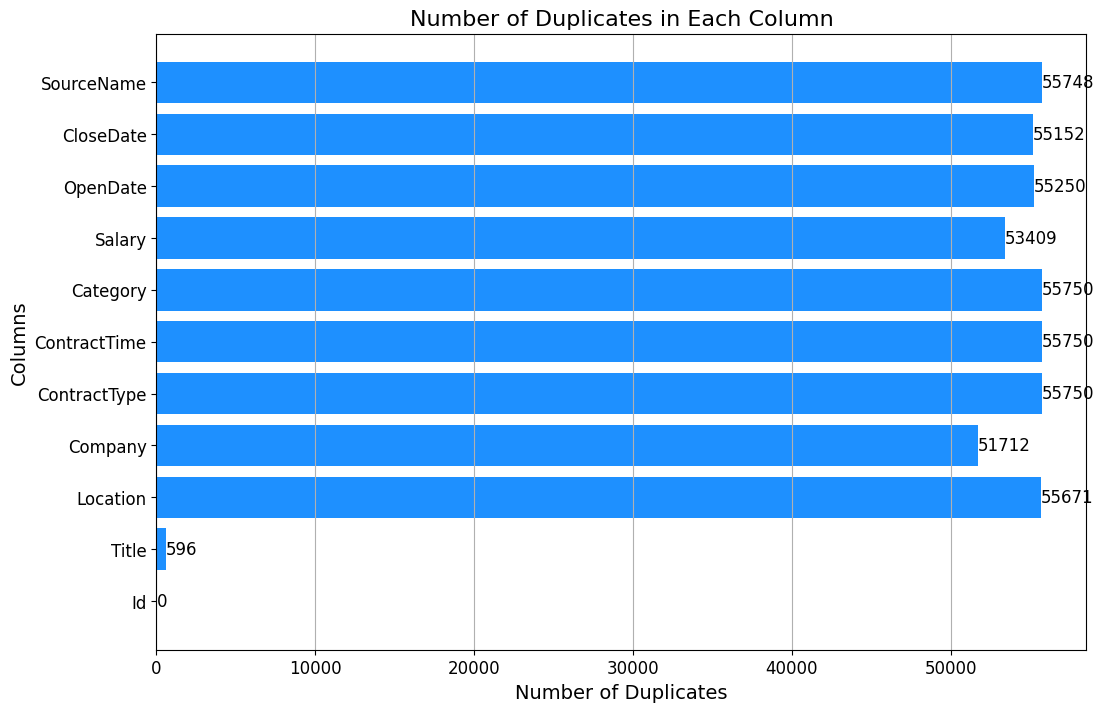

Potential Global Keys for merged dataset: Id


In [27]:
# Identify global key(s)
# Calculate the number of duplicate values in each column
duplicate_counts = df_merged.apply(lambda x: x.duplicated(keep=False).sum())

plt.figure(figsize=(12, 8))
plt.barh(duplicate_counts.index, duplicate_counts.values, color='dodgerblue')
plt.xlabel('Number of Duplicates', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.title('Number of Duplicates in Each Column', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add text labels for the number of duplicates
for i, v in enumerate(duplicate_counts.values):
    plt.text(v + 0.1, i, str(v), va='center', color='black', fontsize=12)

# Add grid lines for better readability
plt.grid(axis='x')

plt.show()

global_keys = identify_global_key(df_merged)
print(f"Potential Global Keys for merged dataset: {global_keys[0]}")

The above code helps to iterate through each column and indicte us if there are any duplicates in a column or not.
The column which will not have duplicates will be the ideal candidate for our `global key`.

In addition to that, the above bar graph indicates number of duplicate values in each column which also clearly shows `Id` have no duplication. 

<b> Conclusively, `Id` column would be the perfect pick for `global key`<b>

### 5. Saving the integrated and reshaped data
The last part of the integration process is to export our output data to csv format, named as:
- 's3891013_dataset_integrated.csv'

In [28]:
df_merged.to_csv('s3891013_dataset_integrated.csv', index=False)

### Detailed Summary of Task 3: Integrating the Job Datasets

#### Initial Setup and Data Import

The notebook begins by importing necessary libraries such as Pandas, NumPy, and Matplotlib. 
It then proceeds to load the second dataset 's3891013_dataset2.csv' into a DataFrame. 
An initial assessment of missing values across each column is conducted.

#### Conflicts Identified

The notebook includes a Markdown cell that lists potential conflicts that could occur at both 
the schema and data levels. These conflicts range from typos and irregularities to duplications 
and missing values.

#### Schema-Level Conflicts and Resolutions

1. **Schema Inspection**: The notebook inspects the schema of the newly loaded dataset 
   and compares it against the global schema defined in Task 1 and 2.

2. **ID Generation**: As specified in the text instructions, the notebook contains a custom 
   ID generator to fill in missing IDs for the second dataset. This ensures that the new IDs 
   do not conflict with existing ones from the first dataset.

3. **Column Alignment and Data Transformation**: The notebook contains code that aligns the 
   columns of the second dataset with the global schema. This involves renaming columns and 
   transforming data types.

#### Data-Level Conflicts and Resolutions

1. **Duplication Handling**: The notebook uses Pandas to identify and handle duplicate records 
   in the unified dataset.

2. **Unique Key Selection**: The notebook also discusses the selection of a unique key for the 
   unified dataset. A justification for this choice is provided, explaining why the chosen key 
   can uniquely identify a job listing.

#### Data Integration

After resolving schema and data-level conflicts, the notebook contains code that merges the 
two datasets into a unified DataFrame. Additional data cleaning steps are performed to ensure 
the integrity of the unified dataset.

#### Final Output

The integrated dataset is saved as 's3891013_dataset_integrated.csv'.

